<a href="https://colab.research.google.com/github/Abdul-Kalam-ak/fcc_predict_health_costs_with_regression/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________
Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10819.4600 - mae:

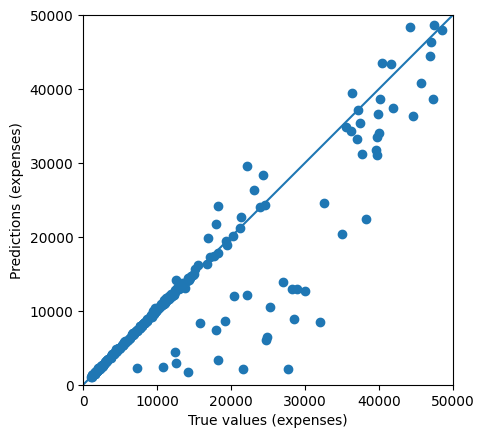

In [3]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import os

from urllib.request import Request, urlopen, urlretrieve
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle

# Import data
if not os.path.exists("insurance.csv"):
    url = "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv"
    req = Request(
        url=url,
        headers={"User-Agent": "Mozilla/5.0"}
    )

    webpage = urlopen(req)

    with open("insurance.csv","wb") as output:
        output.write(webpage.read())

dataset = pd.read_csv('insurance.csv')
dataset.tail()

# Convert categorical data to numbers
dataset["sex"].replace(
    ["female", "male"],
    [0, 1],
    inplace=True
)

dataset["smoker"].replace(
    ["no", "yes"],
    [0, 1],
    inplace=True
)

dataset["region"].replace(
    ['southwest', 'southeast', 'northwest', 'northeast'],
    [0, 1, 2, 3],
    inplace=True
)

dataset = shuffle(dataset).reset_index(drop=True)

# Separating the train and test datasets
train_dataset  = dataset[0:int(0.8*dataset.shape[0])]
test_dataset = dataset[int(0.8*dataset.shape[0]):dataset.shape[0] - 1]

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

# Creating the model
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

# Training the model
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100
)

# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)